# COVID-19 lab result prediction

<p>This daset contains the results of real-time PCR testing for COVID-19 from the <a href="https://www.gob.mx/salud/documentos/datos-abiertos-152127">General Directorate of Epidemiology</a> (more details <a href="https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico/resource/e8c7079c-dc2a-4b6e-8035-08042ed37165">here</a>).
    
<p>These units follow a centinel model that samples 10% of the patients that present a viral respiratory diagnosis to test for COVID-19, and consists of data reported by 475 viral respiratory disease monitoring units (hospitals) named USMER (<b>U</b>nidade<b>s</b> <b>M</b>onitoras de <b>E</b>nfermedad <b>R</b>espiratoria <b>V</b>iral) throughout the country in the entire health sector (IMSS, ISSSTE, SEDENA, SEMAR, and more).</p>

<p>Preliminary data subject to validation by the Ministry of Health through the General Directorate of Epidemiology. The information contained corresponds only to the data obtained from the epidemiological study of a suspected case of viral respiratory disease at the time it is identified in the medical units of the Health Sector.</p>

<p>According to the clinical diagnosis of admission, it is considered as an outpatient or hospitalized patient. The base does not include the evolution during the stay in the medical units, with the exception of updates to your discharge by the hospital epidemiological surveillance units or health jurisdictions in the case of deaths.</p>

## 1. Data

In [53]:
# Print out the first 5 lines from the latest pre-processed report file
!head -n 5 ../latest_raw.csv

"id","FECHA_ARCHIVO","ID_REGISTRO","ENTIDAD_UM","ENTIDAD_RES","RESULTADO","DELAY","ENTIDAD_REGISTRO","ENTIDAD","ABR_ENT","FECHA_ACTUALIZACION","ORIGEN","SECTOR","SEXO","ENTIDAD_NAC","MUNICIPIO_RES","TIPO_PACIENTE","FECHA_INGRESO","FECHA_SINTOMAS","FECHA_DEF","INTUBADO","NEUMONIA","EDAD","NACIONALIDAD","EMBARAZO","HABLA_LENGUA_INDIG","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO","OTRO_CASO","MIGRANTE","PAIS_NACIONALIDAD","PAIS_ORIGEN","UCI"
9269,2020-04-12,"00011f",25,25,2,0,25,"Sinaloa","SL","2020-04-19",2,12,2,25,13,1,"2020-03-20","2020-03-12","9999-99-99",97,2,74,1,97,2,1,2,2,2,1,2,2,1,2,2,2,99,"MÃ©xico","97",97
33333,2020-04-12,"00014e",14,14,2,0,14,"Jalisco","JC","2020-04-19",1,4,1,16,98,2,"2020-03-30","2020-03-30","9999-99-99",2,2,71,1,2,2,1,1,2,2,1,2,2,1,2,1,99,99,"MÃ©xico","97",2
35483,2020-04-12,"000153",8,8,1,0,8,"Chihuahua","CH","2020-04-19",1,4,2,8,19,2,"2020-04-02","2020-03-24","9999-99-99",2,1,50,1,97

## 2. Inspecting the COVID-19 clinical data

In [51]:
# Read file into memory
df = pd.read_csv('../latest_raw.csv')
df.head(5)

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,99,99,MÃ©xico,97,97


In [4]:
# Show the shape (number of rows & columns)
df.shape

(188616, 41)

In [5]:
# Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

id                     0
FECHA_ARCHIVO          0
ID_REGISTRO            0
ENTIDAD_UM             0
ENTIDAD_RES            0
RESULTADO              0
DELAY                  0
ENTIDAD_REGISTRO       0
ENTIDAD                0
ABR_ENT                0
FECHA_ACTUALIZACION    0
ORIGEN                 0
SECTOR                 0
SEXO                   0
ENTIDAD_NAC            0
MUNICIPIO_RES          6
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0


In [6]:
# Remove null data
df = df[~df.isnull().any(axis=1)]

In [7]:
# Exclude observations that don't have a result of the test yet
df = df[df.RESULTADO != 3]

In [8]:
# Exclude features we don't need for analysis
df = df[df.columns[~df.columns.isin(
    ['id', 'ID_REGISTRO',
     'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF',
     'ABREVIATURA_ENTIDAD', 'NACIONALIDAD', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'ENTIDAD']
)]]

In [58]:
# We ideally want every remaining column to be of numeric type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188616 entries, 0 to 188615
Data columns (total 41 columns):
id                     188616 non-null int64
FECHA_ARCHIVO          188616 non-null object
ID_REGISTRO            188616 non-null object
ENTIDAD_UM             188616 non-null int64
ENTIDAD_RES            188616 non-null int64
RESULTADO              188616 non-null int64
DELAY                  188616 non-null int64
ENTIDAD_REGISTRO       188616 non-null int64
ENTIDAD                188616 non-null object
ABR_ENT                188616 non-null object
FECHA_ACTUALIZACION    188616 non-null object
ORIGEN                 188616 non-null int64
SECTOR                 188616 non-null int64
SEXO                   188616 non-null int64
ENTIDAD_NAC            188616 non-null int64
MUNICIPIO_RES          188610 non-null float64
TIPO_PACIENTE          188616 non-null int64
FECHA_INGRESO          188616 non-null object
FECHA_SINTOMAS         188616 non-null object
FECHA_DEF              18

In [9]:
df.keys()

Index(['ENTIDAD_UM', 'ENTIDAD_RES', 'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO',
       'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC', 'MUNICIPIO_RES',
       'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'UCI'],
      dtype='object')

### 3. Model

We are aiming to predict whether a patient with pending COVID-19 results will get a positive or a negative result:
<ul>
<li>As lab results are processed, this leaves a window when it's uncertain whether a result will return positive or negative (we are assuming that the epidemiology data can be infomative for the prediction).</li>
<li>Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the person.</li>
</ul>
<p>The value of the lab result comes from a real-time PCR, and is stored in <code>'RESULTADO'</code>, where <code>1=POSITIVE</code>, <code>2=NEGATIVE</code>, <code>3=IN PROGRESS</code>.

In [60]:
print(df['RESULTADO'].unique())

[2 1]


Since the data was already pre-processed, we don't have to exclude lab results that are in progress. But if we wasn't the case, we could exclute this observsations like such:

In [62]:
# Nothing should change if we do this because pre-process already removed in-progress lab cases
df = df[df.RESULTADO != 3]

In any case it's good to follow convention for binary classifiers, so let's re-factor the data:

In [64]:
# Refactor result into binary categories (0=negative, 1=positive)
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('2','0')
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('1','1')

<p>Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.</p>

In [66]:
# Print target incidence proportions, rounding output to 3 decimal places
df.RESULTADO.value_counts(normalize=True).round(3)

0    0.644
1    0.356
Name: RESULTADO, dtype: float64

Now we want the target variable to be in the first position of the dataframe to make things a little bit easier:

In [10]:
# Remove target variable to move it to the first position of dataframe
col_name = 'RESULTADO'
first_col = df.pop(col_name)

In [11]:
# Now we can use Pandas insert() function and insert the opped column into first position of the dataframe
# The first argument of insert() function is the location we want to insert, here it is 0
df.insert(0, col_name, first_col)

In [12]:
df

,RESULTADO,ENTIDAD_UM,ENTIDAD_RES,DELAY,ENTIDAD_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI
0,2,25,25,0,25,2,12,2,25,13.0,...,2,2,1,2,2,1,2,2,2,97
1,2,14,14,0,14,1,4,1,16,98.0,...,2,2,1,2,2,1,2,1,99,2
2,1,8,8,0,8,1,4,2,8,19.0,...,2,2,2,2,2,2,2,2,99,2
3,1,9,15,0,9,2,4,1,15,33.0,...,2,2,2,2,2,1,2,2,99,97
4,2,9,9,0,9,1,4,1,99,15.0,...,2,2,2,2,2,2,2,2,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188611,1,16,16,0,16,2,4,1,16,53.0,...,2,2,2,2,2,2,2,2,99,97
188612,2,19,19,0,19,1,4,1,24,39.0,...,2,2,1,2,2,2,1,2,99,97
188613,1,8,8,0,8,2,12,1,8,37.0,...,2,2,2,2,2,1,2,2,2,97
188614,2,11,11,0,11,2,4,2,11,37.0,...,2,2,1,2,2,2,2,1,99,97


In [14]:
# Convert the data into an array, this will help the neural network
dataset = df.values
dataset

array([['0', 25, 25, ..., 2, 2, 97],
       ['0', 14, 14, ..., 1, 99, 2],
       ['1', 8, 8, ..., 2, 99, 2],
       ...,
       ['1', 8, 8, ..., 2, 2, 97],
       ['0', 11, 11, ..., 1, 99, 97],
       ['1', 13, 13, ..., 2, 2, 97]], dtype=object)

In [15]:
# Split the data into
    # independent/feature data set=X
    # dependent/target data set=y

# Get all of the rows from all but the first column of dataset
X = dataset[:,1:28]

# Get all of the rows from the first column
y = dataset[:,0] 

In [16]:
X

array([[25, 25, 0, ..., 2, 2, 97],
       [14, 14, 0, ..., 1, 99, 2],
       [8, 8, 0, ..., 2, 99, 2],
       ...,
       [8, 8, 0, ..., 2, 2, 97],
       [11, 11, 0, ..., 1, 99, 97],
       [13, 13, 0, ..., 2, 2, 97]], dtype=object)

In [17]:
y

array(['0', '0', '1', ..., '1', '0', '1'], dtype=object)

In [18]:
# Process the feature data set to contain values between 0 and 1 inclusive,
# by using the min-max scaler method, and print the values

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.77419355, 0.77419355, 0.        , ..., 0.01030928, 0.01020408,
        0.97959184],
       [0.41935484, 0.41935484, 0.        , ..., 0.        , 1.        ,
        0.01020408],
       [0.22580645, 0.22580645, 0.        , ..., 0.01030928, 1.        ,
        0.01020408],
       ...,
       [0.22580645, 0.22580645, 0.        , ..., 0.01030928, 0.01020408,
        0.97959184],
       [0.32258065, 0.32258065, 0.        , ..., 0.        , 1.        ,
        0.97959184],
       [0.38709677, 0.38709677, 0.        , ..., 0.01030928, 0.01020408,
        0.97959184]])

In [19]:
# Split the data again - this time into 80% for training and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=4)

### Model

The model's architecture will contain three layers:
1. The first layer will have 12 neurons and use the <code>ReLu</code> activation function.
2. The second layer will have 15 neurons and use the <code>ReLu</code> activation function.
3. The third and final layer will use 1 neuron and the <code>sigmoid</code> activation function.

In [54]:
# https://stackoverflow.com/questions/55496289/how-to-fix-attributeerror-module-tensorflow-has-no-attribute-get-default-gr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split

In [20]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(27, )),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

1. Compile the model and give it the <code>'binary_crossentropy'</code> loss function (used for binary classification) to measure how well the model did on training
2. Then give it the Stochastic Gradient Descent <code>'sgd'</code> optimizer to improve upon the loss.
3. To measure the accuracy of the model add <code>'accuracy'</code> to the metrics.

In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training

Train the model by using the fit method on the training data, and train it in batch sizes of 57, with 100 epochs. Give the model validation data to see how well the model is performing by splitting the training data into 20% validation.
<br>
- Batch: Total number of training examples present in a single batch<br>
- Epoch: The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE<br>
- Fit: Another word for train

In [27]:
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=100, validation_split=0.2)

Train on 120710 samples, validate on 30178 samples
Epoch 1/100
120710/120710 [==============================] - 9s 72us/sample - loss: 0.6208 - accuracy: 0.6701 - val_loss: 0.6208 - val_accuracy: 0.6712
Epoch 2/100
120710/120710 [==============================] - 8s 65us/sample - loss: 0.6206 - accuracy: 0.6704 - val_loss: 0.6206 - val_accuracy: 0.6712
Epoch 3/100
120710/120710 [==============================] - 5s 45us/sample - loss: 0.6204 - accuracy: 0.6705 - val_loss: 0.6204 - val_accuracy: 0.6713
Epoch 4/100
120710/120710 [==============================] - 6s 52us/sample - loss: 0.6202 - accuracy: 0.6705 - val_loss: 0.6203 - val_accuracy: 0.6717
Epoch 5/100
120710/120710 [==============================] - 6s 52us/sample - loss: 0.6201 - accuracy: 0.6707 - val_loss: 0.6201 - val_accuracy: 0.6720
Epoch 6/100
120710/120710 [==============================] - 8s 67us/sample - loss: 0.6199 - accuracy: 0.6707 - val_loss: 0.6199 - val_accuracy: 0.6722
Epoch 7/100
120710/120710 [==========

Visualize the training loss and the validation loss to see if the model is overfitting

In [55]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

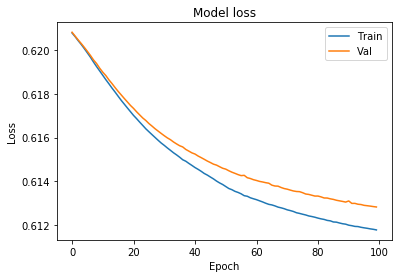

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.

The problem with overfitting, is that the more specialized the model becomes to training data, the less well it is able to generalize to new data, resulting in an increase in generalization error. This increase in generalization error can be measured by the performance of the model on the validation dataset.

A plot of learning curves shows overfitting if:

- The plot of training loss continues to decrease with experience.
- The plot of validation loss decreases to a point and begins increasing again.

The inflection point in validation loss may be the point at which training could be halted as experience after that point shows the dynamics of overfitting.

The example plot above demonstrates a case of overfitting.

In [32]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualize the training accuracy and the validation accuracy to see if the model is overfitting

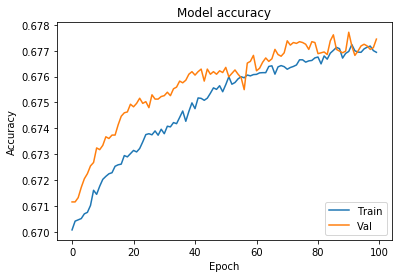

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Use the model to make a prediction using the testing data set X_test. Since neural networks only give probabilities (values between 0 and 1 inclusive), create a threshold where values .5 and above classify the target data as (1) and values less then that as (0).

In [42]:
# Make a prediction and print the actual values
prediction = model.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction] # threshold
#print(prediction)
#print(y_test

### Evaluate

In [49]:
# Now evaluate the model on the training data set
model.evaluate(X_test, y_test)[1]

37722/37722 [==============================] - 2s 45us/sample - loss: 0.6115 - accuracy: 0.6774


0.6773501